# Project 2: Real-world Data Wrangling - Analyzing Movie and TV Show Datasets

In this project. Our main objective is to gain insightful information and understanding from the datasets of movies and TV shows on Netflix and Hulu platform. To achieve this, we will focus on gathering and wrangling the data, ensuring its quality and structure. By effectively cleaning and organizing the data, we can combine and analyze it to extract valuable insights and answer research questions related to the content offerings, trends, and user preferences on Netflix and Hulu.

Table of Contents
- Gather
- Assess
- Clean
- Update
- Answer the research question

In [1]:
import pandas as pd
import numpy as np  
import requests
import os
import zipfile
import sqlalchemy as sqla
import seaborn as sns
import matplotlib.pyplot as plt
import kaggle

# 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

# 1.1. Problem Statement

This project aims to compare and analyze the movie and TV show of two prominent streaming platforms, Netflix and Hulu to gain a comprehensive understanding of the growth trends in release years and the distribution of ratings between these platforms. By addressing these questions, the project aims to identify notable differences and patterns in content availability and user preferences, providing valuable insights for viewers, content creators. The analysis of these factors will contribute to a deeper understanding of the dynamics and strategies employed by Netflix and Hulu, facilitating informed decision-making and enhancing the overall viewing experience for users.



Research Questions:

1-How can the growth trends of Netflix's and Hulu's release year distributions be compared?

2-Are there any notable differences in the distribution of movie and tv show ratings between Netflix and Hulu?


In [2]:
# Define the folder name
folder_name = "Datasets"

# Check if the directory already exists
if not os.path.exists(folder_name):
    # Create the directory
    os.makedirs(folder_name)

# Get the current working directory
current_directory = os.getcwd()

# Build the file path by joining the current directory and the folder name
file_path = os.path.join(current_directory, folder_name)

# **Dataset 1**

Type:CSV File.

Method:The data was gathered using the "Downloading files manually" method from Kaggle


Dataset variables:

*   show_id:ID for every Movie/TV Show
*   type :  A Movie or TV Show
*   title: : Title of the Movie or TV Show
*   director : Director name
*   cast : cast name
*   country: Country of Production
*   date_added: Date added of the Movie /TV Show
*   release_year: Release year of the Movie / TV Show
*   rating: Motion Picture Association film rating system
*   duration: Duration of the Movie/TV show
*   listed_in:Genres
*   description: description of the Movie /TV show

URL: https://www.kaggle.com/datasets/shivamb/netflix-shows/data

In [3]:
df = pd.read_csv('.//netflix_titles.csv')
# Define the file path and name to save the dataset
file_path = "Datasets/netflix_titles.csv"

# Save the DataFrame as a CSV file
df.to_csv(file_path, index=False)

print("Dataset saved successfully.")

Dataset saved successfully.


In [4]:
df_netflix_raw = pd.read_csv("Datasets/netflix_titles.csv") # Read in the file

This method suitable when the data is available for direct download from a website or source. 

# **Dataset 2**

Type: zip File.

Method:The data was gathered programiticlly method from Kaggle

Dataset variables:

*   show_id:ID for every Movie/TV Show
*   type :  A Movie or TV Show
*   title: : Title of the Movie or TV Show
*   director : Director name
*   cast : cast name
*   country: Country of Production
*   date_added: Date added of the Movie /TV Show
*   release_year: Release year of the Movie / TV Show
*   rating: Motion Picture Association film rating system
*   duration: Duration of the Movie/TV show
*   listed_in:Genres
*   description: description of the Movie /TV show

URL:https://www.kaggle.com/datasets/shivamb/hulu-movies-and-tv-shows

In [7]:
# Unzip dataset

file_path =  r"C:\Users\hp\Downloads\Hulu.zip"  # Path to the zip file

with zipfile.ZipFile(file_path, "r") as zip_ref:
    zip_ref.extractall("Datasets")

In [8]:
df_hulu_raw = pd.read_csv("Datasets/hulu_titles.csv") # Read in the file

This method is preferred when there is a need to automate the process of downloading files.

# 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List two data quality issues and two tidiness issues. Assess each data issue visually and programmatically, then briefly describe the issue you find. Make sure you include justifications for the methods you use for the assessment.

# Visual Assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes

In [9]:
df_netflix_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df_hulu_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


The Show_id element doesn't show the ID, and it's not suitable for matching columns representing different movies/TV shows.

# Programmatic Assessment


In [11]:
df_netflix_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df_hulu_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


In [13]:
df_netflix_raw.shape

(8807, 12)

In [14]:
df_hulu_raw.shape

(3073, 12)

In [15]:
df_netflix_raw.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
df_hulu_raw.isnull().sum()

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64

In [17]:
df_netflix_raw.duplicated().sum()

0

In [18]:
df_hulu_raw.duplicated().sum()

0

The datasets contain missing values, but they can be addressed without impacting the analysis. The Pandas library provides useful functions and methods to handle these null values and preprocess the dataset for further analysis.

# Quality

Data quality is crucial for ensuring the reliability and usability of a dataset. It encompasses several aspects, including completeness, validity, accuracy, consistency, and uniqueness. Completeness refers to the presence of all required data elements, while validity ensures that the data conforms to predefined rules and constraints. Accuracy pertains to the correctness and precision of the data, and consistency focuses on the coherence and conformity of data across different sources or within the same dataset. Uniqueness ensures that each data element is unique and free from duplicates. Evaluating and addressing these quality issues is essential for accurate analysis and informed decision-making processes.

# Quality Issue 1: Inconsistent Data Format

In [19]:
# Inspecting the dataframe visually
df_netflix_raw[['date_added', 'type']].head(5)

,date_added,type
0,"September 25, 2021",Movie
1,"September 24, 2021",TV Show
2,"September 24, 2021",TV Show
3,"September 24, 2021",TV Show
4,"September 24, 2021",TV Show


In [20]:
df_hulu_raw[['date_added', 'type']].head(5)

,date_added,type
0,"October 24, 2021",Movie
1,"October 23, 2021",Movie
2,"October 23, 2021",Movie
3,"October 22, 2021",Movie
4,"October 22, 2021",Movie


In [21]:
#Inspecting the dataframe programmatically
df_netflix_raw.dtypes 

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [22]:
df_hulu_raw.dtypes 

show_id          object
type             object
title            object
director         object
cast            float64
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
dtype: object

In [23]:
df_netflix_raw[['date_added', 'type']].describe()

,date_added,type
count,8797,8807
unique,1767,2
top,"January 1, 2020",Movie
freq,109,6131


In [24]:
df_hulu_raw[['date_added', 'type']].describe()

,date_added,type
count,3045,3073
unique,1115,2
top,"October 1, 2021",TV Show
freq,92,1589


Issue and justification: Both datasets have the "date_added" and "type" columns in an incorrect format. It is crucial to ensure that these columns have the correct format to maintain data integrity and facilitate proper analysis. 

# Quality Issue 2: Missing Values

In [25]:
df_netflix_raw.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [26]:
df_hulu_raw.isnull().sum()

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64

Issue and justification:Null values in both datasets can compromise data quality. However,to address the issue of missing data in our analysis, we can handle it by using the "NaN" (Not a Number) value to represent the missing data. This approach allows us to maintain the integrity of the dataset while acknowledging the presence of missing values.

# Quality Issue 3: Invalid Ratings Values in the Ratings Column

In [27]:
 # value counts for ratings
df_netflix_raw.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [28]:
df_hulu_raw.rating.value_counts()

TV-14     691
TV-MA     391
R         345
TV-PG     321
PG-13     163
         ... 
34 min      1
47 min      1
65 min      1
37 min      1
71 min      1
Name: rating, Length: 88, dtype: int64

In [29]:
df_netflix_raw.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [30]:
df_hulu_raw.rating.unique()

array(['TV-MA', nan, 'PG-13', 'R', 'TV-14', 'PG', 'TV-PG', 'NOT RATED',
       'G', 'TV-G', '2 Seasons', 'TV-Y', '93 min', '4 Seasons', 'TV-Y7',
       '136 min', '91 min', '85 min', '98 min', '89 min', '94 min',
       '86 min', '3 Seasons', '121 min', '88 min', '101 min', '1 Season',
       '83 min', '100 min', '95 min', '92 min', '96 min', '109 min',
       '99 min', '75 min', '87 min', '67 min', '104 min', '107 min',
       '84 min', '103 min', '105 min', '119 min', '114 min', '82 min',
       '90 min', '130 min', '110 min', '80 min', '6 Seasons', '97 min',
       '111 min', '81 min', '49 min', '45 min', '41 min', '73 min',
       '40 min', '36 min', '39 min', '34 min', '47 min', '65 min',
       '37 min', '78 min', '102 min', '129 min', '115 min', '112 min',
       'NR', '61 min', '106 min', '76 min', '77 min', '79 min', '157 min',
       '28 min', '64 min', '7 min', '5 min', '6 min', '127 min',
       '142 min', '108 min', '57 min', '118 min', '116 min', '12 Seasons',
       '71 

Issue and justification: The ratings column contains erroneous values that do not correspond to valid rating classifications. These values may be incorrect entries, misspellings, or inconsistent formats.The presence of erroneous values in the ratings column affects the data quality and reliability. It can lead to misleading or incorrect analysis or comparisons based on ratings.

# Tidiness


Tidiness in datasets refers to organizing data in a structured manner, where each variable has its own column, each observation has its own row, and each value occupies a single cell. This allows for easier and more efficient data analysis.

The dataset I selected was well-structured overall, with the majority of columns meeting the conditions of tidy data. However, I did identify one column that did not meet the requirements of tidy data. Additionally, I identified an additional quality issue within the dataset to compensate for the lack of tidiness.

# Tidiness Issue 1: Multiple variables in Duration column


In [31]:
# Inspecting the dataframe visually
df_netflix_raw['duration'].head(6)

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
5     1 Season
Name: duration, dtype: object

In [32]:
df_hulu_raw['duration'].head(6)

0         NaN
1      94 min
2     108 min
3      97 min
4     104 min
5    1 Season
Name: duration, dtype: object

In [33]:
#Inspecting the dataframe programmatically
df_netflix_raw['duration'].describe()

count         8804
unique         220
top       1 Season
freq          1793
Name: duration, dtype: object

In [34]:
df_hulu_raw['duration'].describe()

count         2594
unique         135
top       1 Season
freq           829
Name: duration, dtype: object

In [35]:
df_netflix_raw.duration.value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [36]:
df_hulu_raw.duration.value_counts()

1 Season      829
2 Seasons     265
3 Seasons     121
4 Seasons      99
5 Seasons      80
             ... 
19 Seasons      1
30 Seasons      1
149 min         1
52 min          1
26 Seasons      1
Name: duration, Length: 135, dtype: int64

Issue and justification: The "Duration" column in the both dataset contains mixed units of measurement, such as seasons and minutes,combined into a single column. 
This violates the principles of tidy data, as each variable should have its own column, and the units of measurement should be consistent within a column.

# 3. Clean data

Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

Make copies of the datasets to ensure the raw dataframes are not impacted

In [37]:
df_netflix_cleaned = df_netflix_raw.copy()
df_hulu_cleaned = df_hulu_raw.copy()

# Quality Issue 1: Inconsistent Data Format

In [38]:
df_netflix_cleaned['date_added'] = pd.to_datetime(df_netflix_cleaned['date_added'])
df_netflix_cleaned['type'] = df_netflix_cleaned['type'].astype('category')

In [39]:
# Validate the cleaning was successful
df_netflix_cleaned.dtypes 

show_id                 object
type                  category
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [40]:
df_hulu_cleaned['date_added'] = pd.to_datetime(df_hulu_cleaned['date_added'])
df_hulu_cleaned['type'] = df_hulu_cleaned['type'].astype('category')

In [41]:
# Validate the cleaning was successful
df_hulu_cleaned.dtypes 

show_id                 object
type                  category
title                   object
director                object
cast                   float64
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

Justification: The code pd.to_datetime(df_dataset_cleaned['date_added']) converts the 'date_added' column to a datetime format, ensuring proper handling of dates. Similarly, df_dataset_cleaned['type'].astype('category') converts the 'type' column to the categorical type, enhancing data analysis by treating it as distinct categories. These transformations significantly improve data quality, enabling more accurate analysis and informed decision-making.

# Quality Issue 2: Missing Values: 

In [42]:
# Check nulls values
df_netflix_cleaned.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [43]:
df_hulu_cleaned.isnull().sum()

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64

In [44]:
df_netflix_cleaned[['director', 'country', 'cast', 'rating', 'duration']] = df_netflix_cleaned[['director', 
'country', 'cast', 'rating', 'duration']].fillna("NAN")

In [45]:
df_netflix_cleaned['date_added'].fillna(df_netflix_cleaned['date_added'].mode()[0], inplace=True)

In [46]:
df_hulu_cleaned[['director','country', 'cast','rating' ,'duration','description']]= df_hulu_cleaned[['director',
'country', 'cast','rating' ,'duration','description']].fillna("NAN")

In [47]:
df_hulu_cleaned['date_added'].fillna(df_hulu_cleaned['date_added'].mode()[0], inplace=True)

In [48]:
#Validate the cleaning was successful
df_netflix_cleaned.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [49]:
df_hulu_cleaned.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Justification:The first code snippet is justified as it fills missing values with the string 'NAN' in the specified columns. This approach of using a distinct indicator like 'NAN' is one strategy for handling missing data. The choice of this approach depends on various factors, including the data's nature and the specific analysis requirements.

The second code snippet is also justified as it fills missing values in the 'date_added' column with the most frequent value in that column. This strategy of imputing missing values with the mode value is another approach for handling missing data. The suitability of this approach depends on factors such as the distribution of values in the column and the potential impact of the imputed values on the analysis results.

# Quality Issue 3: Invalid Ratings Values in the Ratings Column

In [50]:
 # value counts for ratings
df_netflix_cleaned.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NAN            4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [51]:
df_hulu_cleaned.rating.value_counts()

TV-14        691
NAN          520
TV-MA        391
R            345
TV-PG        321
            ... 
47 min         1
65 min         1
37 min         1
NOT RATED      1
71 min         1
Name: rating, Length: 89, dtype: int64

In [52]:
df_netflix_cleaned.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', 'NAN',
       'TV-Y7-FV', 'UR'], dtype=object)

In [53]:
def Invalid_rating_with_nan(df, column_name):
    # Identify rows with invalid rating values
    invalid_rating_rows = df[column_name].str.contains('min|Season', na=False)

    # Replace invalid rating values with NaN
    df.loc[invalid_rating_rows, column_name] = np.nan

In [54]:
Invalid_rating_with_nan(df_netflix_cleaned, 'rating')

In [55]:
# Validate the cleaning was successful
df_netflix_cleaned.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'NAN', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [56]:
Invalid_rating_with_nan(df_hulu_cleaned, 'rating')

In [57]:
# Validate the cleaning was successful
df_hulu_cleaned.rating.unique()

array(['TV-MA', 'NAN', 'PG-13', 'R', 'TV-14', 'PG', 'TV-PG', 'NOT RATED',
       'G', 'TV-G', nan, 'TV-Y', 'TV-Y7', 'NR'], dtype=object)

Justification:The code utilizes the str.contains() method to identify rows with invalid ratings,specifically those containing "min" or "Season" entries. It then uses .loc indexing to select these rows and replaces the corresponding values in the specified column with NaN. This method ensures data integrity by replacing invalid ratings with NaN, denoting missing or unknown values.

# Tidiness Issue 1: Multiple variables in Duration column


In [58]:
df_netflix_cleaned['duration'].head(6)

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
5     1 Season
Name: duration, dtype: object

In [59]:
df_hulu_cleaned['duration'].head(6)

0         NAN
1      94 min
2     108 min
3      97 min
4     104 min
5    1 Season
Name: duration, dtype: object

In [60]:
# Extract numeric values and units into separate columns
duration_pattern = df_netflix_cleaned.duration.str.extract(
    r"(?P<minutes>\d+) min|(?P<seasons>\d+) Seasons")

In [61]:
duration_pattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   minutes  6128 non-null   object
 1   seasons  883 non-null    object
dtypes: object(2)
memory usage: 137.7+ KB


In [62]:
# Convert the extracted columns to numeric type and then convert them to integers
duration_pattern['minutes'] = pd.to_numeric(duration_pattern['minutes']).astype('Int64')
duration_pattern['seasons'] = pd.to_numeric(duration_pattern['seasons']).astype('Int64')

In [63]:
duration_pattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   minutes  6128 non-null   Int64
 1   seasons  883 non-null    Int64
dtypes: Int64(2)
memory usage: 154.9 KB


In [64]:
# Combine extracted columns with the original DataFrame
df_netflix_cleaned = pd.concat([df_netflix_cleaned, duration_pattern], axis=1)

# Drop the original "duration" column
df_netflix_cleaned = df_netflix_cleaned.drop('duration', axis=1)

In [65]:
# Validate the cleaning was successful
df_netflix_cleaned.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,minutes,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NAN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,<NA>
1,s2,TV Show,Blood & Water,NAN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",<NA>,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NAN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,<NA>,<NA>


I'll use the same approach for Hulu Dataset.

In [66]:
# Extract numeric values and units into separate columns
duration_pattern_hulu = df_hulu_cleaned.duration.str.extract(
    r"(?P<minutes>\d+) min|(?P<seasons>\d+) Seasons")

In [67]:
duration_pattern_hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   minutes  1005 non-null   object
 1   seasons  760 non-null    object
dtypes: object(2)
memory usage: 48.1+ KB


In [68]:
# Convert extracted columns to numeric type and then convert to int
duration_pattern_hulu['minutes'] = pd.to_numeric(duration_pattern_hulu['minutes']).astype('Int64')
duration_pattern_hulu['seasons'] = pd.to_numeric(duration_pattern_hulu['seasons']).astype('Int64')

In [69]:
# Combine extracted columns with the original DataFrame
df_hulu_cleaned = pd.concat([df_hulu_cleaned, duration_pattern_hulu], axis=1)

# Drop the original "duration" column
df_hulu_cleaned = df_hulu_cleaned.drop('duration', axis=1)

In [70]:
# Validate the cleaning was successful
df_hulu_cleaned.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,minutes,seasons
0,s1,Movie,Ricky Velez: Here's Everything,NAN,NAN,NAN,2021-10-24,2021,TV-MA,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...,<NA>,<NA>
1,s2,Movie,Silent Night,NAN,NAN,NAN,2021-10-23,2020,NAN,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r...",94,<NA>


Justification:We extracted the numerical values and units (minutes or seasons) from a string representing durations using regular expressions. The extracted values were converted to integers and combined with the original dataset, resulting in a clean and organized dataset. By dropping the original column, we removed unnecessary information and ensured the dataset was suitable for further analysis and interpretation.

# Remove unnecessary variables and combine datasets


In [71]:
# Remove unnecessary variables and combine Netflix and Hulu datasets
df_netflix_cleaned = df_netflix_cleaned[["type","title", "release_year","rating","minutes", "seasons"]]
df_hulu_cleaned = df_hulu_cleaned[["type", "title","release_year","rating","minutes", "seasons"]]

In [72]:
df_netflix_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   type          8807 non-null   category
 1   title         8807 non-null   object  
 2   release_year  8807 non-null   int64   
 3   rating        8804 non-null   object  
 4   minutes       6128 non-null   Int64   
 5   seasons       883 non-null    Int64   
dtypes: Int64(2), category(1), int64(1), object(2)
memory usage: 370.1+ KB


In [73]:
df_hulu_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   type          3073 non-null   category
 1   title         3073 non-null   object  
 2   release_year  3073 non-null   int64   
 3   rating        2781 non-null   object  
 4   minutes       1005 non-null   Int64   
 5   seasons       760 non-null    Int64   
dtypes: Int64(2), category(1), int64(1), object(2)
memory usage: 129.3+ KB


In [74]:
merged_df = pd.merge(
df_netflix_cleaned,df_hulu_cleaned,on=["title"],how="outer",indicator=True,)
merged_df.head(3)

,type_x,title,release_year_x,rating_x,minutes_x,seasons_x,type_y,release_year_y,rating_y,minutes_y,seasons_y,_merge
0,Movie,Dick Johnson Is Dead,2020.0,PG-13,90,<NA>,NaN,NaN,NaN,<NA>,<NA>,left_only
1,TV Show,Blood & Water,2021.0,TV-MA,<NA>,2,NaN,NaN,NaN,<NA>,<NA>,left_only
2,TV Show,Ganglands,2021.0,TV-MA,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,left_only


In [75]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11649 entries, 0 to 11648
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   type_x          8807 non-null   category
 1   title           11649 non-null  object  
 2   release_year_x  8807 non-null   float64 
 3   rating_x        8804 non-null   object  
 4   minutes_x       6128 non-null   Int64   
 5   seasons_x       883 non-null    Int64   
 6   type_y          3073 non-null   category
 7   release_year_y  3073 non-null   float64 
 8   rating_y        2781 non-null   object  
 9   minutes_y       1005 non-null   Int64   
 10  seasons_y       760 non-null    Int64   
 11  _merge          11649 non-null  category
dtypes: Int64(4), category(3), float64(2), object(3)
memory usage: 990.1+ KB


In [76]:
merged_df["type"] = merged_df["type_x"].combine_first(merged_df["type_y"])

merged_df["release_year"] = merged_df["release_year_x"].combine_first(
    merged_df["release_year_y"]
)
merged_df["rating"] = merged_df["rating_x"].combine_first(
    merged_df["rating_y"]
)
merged_df["minutes"] = merged_df["minutes_x"].combine_first(

    merged_df["minutes_y"])
merged_df["seasons"] = merged_df["seasons_x"].combine_first(
    merged_df["seasons_y"])
#The code merges the values from two columns in a DataFrame, combining them into a new column.

In [77]:
#Replacing "left_only" with "Netflix" and "right_only" with "Hulu" in the "_merge" column
merged_df["_merge"].replace("left_only", "Netflix", inplace=True)
merged_df["_merge"].replace("right_only", "Hulu", inplace=True)

In [78]:
merged_df.rename(columns={"_merge": "Streaming_Platform"}, inplace=True)

In [79]:
merged_df.head(3)

,type_x,title,release_year_x,rating_x,minutes_x,seasons_x,type_y,release_year_y,rating_y,minutes_y,seasons_y,Streaming_Platform,type,release_year,rating,minutes,seasons
0,Movie,Dick Johnson Is Dead,2020.0,PG-13,90,<NA>,NaN,NaN,NaN,<NA>,<NA>,Netflix,Movie,2020.0,PG-13,90,<NA>
1,TV Show,Blood & Water,2021.0,TV-MA,<NA>,2,NaN,NaN,NaN,<NA>,<NA>,Netflix,TV Show,2021.0,TV-MA,<NA>,2
2,TV Show,Ganglands,2021.0,TV-MA,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,Netflix,TV Show,2021.0,TV-MA,<NA>,<NA>


In [80]:
# Dropping multiple columns from the "merged_df" DataFrame
merged_df.drop(
    columns=[
"type_x","release_year_x","minutes_x","seasons_x","rating_x","rating_y","type_y", 
        "release_year_y","minutes_y","seasons_y",],inplace=True,)

In [81]:
merged_df.head(3)

,title,Streaming_Platform,type,release_year,rating,minutes,seasons
0,Dick Johnson Is Dead,Netflix,Movie,2020.0,PG-13,90,<NA>
1,Blood & Water,Netflix,TV Show,2021.0,TV-MA,<NA>,2
2,Ganglands,Netflix,TV Show,2021.0,TV-MA,<NA>,<NA>


In [82]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11649 entries, 0 to 11648
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   title               11649 non-null  object  
 1   Streaming_Platform  11649 non-null  category
 2   type                11649 non-null  category
 3   release_year        11649 non-null  float64 
 4   rating              11372 non-null  object  
 5   minutes             7052 non-null   Int64   
 6   seasons             1597 non-null   Int64   
dtypes: Int64(2), category(2), float64(1), object(2)
memory usage: 591.8+ KB


# 4. Update your data store



Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store


In [83]:
# saving data
merged_df.to_csv("Datasets/Analyzing_Movie_and_tv_show.csv", index=False)

In [84]:
master_movie_tv_table = merged_df.copy()

# Create SQLAlchemy Engine and empty  database
engine = sqla.create_engine("sqlite:///Analyzing_Movie_and_tv_show.db")

# Store cleaned master DataFrame in a table.
master_movie_tv_table.to_sql(
    "Movie_and_TV_Show_Data_Cleaned_table", engine, index=False, if_exists="replace"
)

# Store raw  DataFrame in a table .
df_netflix_raw.to_sql(
    "raw_movie_and_tv_show_netflix", engine, index=False, if_exists="replace"
)

# Store raw  DataFrame in a table.
df_hulu_raw.to_sql(
    "raw_movie_and_tv_show_hulu", engine, index=False, if_exists="replace"
)

In [85]:
# Create SQLAlchemy engine
engine = sqla.create_engine("sqlite:///Analyzing_Movie_and_tv_show.db")

# Read data from table into DataFrame
New_df = pd.read_sql_query("SELECT * FROM Movie_and_TV_Show_Data_Cleaned_table", con=engine)

New_df.head()

,title,Streaming_Platform,type,release_year,rating,minutes,seasons
0,Dick Johnson Is Dead,Netflix,Movie,2020.0,PG-13,90.0,NaN
1,Blood & Water,Netflix,TV Show,2021.0,TV-MA,NaN,2.0
2,Ganglands,Netflix,TV Show,2021.0,TV-MA,NaN,NaN
3,Jailbirds New Orleans,Netflix,TV Show,2021.0,TV-MA,NaN,NaN
4,Kota Factory,Netflix,TV Show,2021.0,TV-MA,NaN,2.0


In [86]:
df_raw_netflix = pd.read_sql_table("raw_movie_and_tv_show_netflix", con=engine)
df_raw_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [87]:
df_raw_hulu = pd.read_sql_table("raw_movie_and_tv_show_hulu", con=engine)
df_raw_hulu.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,None,NaN,None,"October 24, 2021",2021,TV-MA,None,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,None,NaN,None,"October 23, 2021",2020,None,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,None,NaN,None,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,None,NaN,None,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,None,NaN,None,"October 22, 2021",2021,None,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


# 5. Answer the research question

5.1: Define and answer the research question
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce at least two visualizations using the cleaned data and explain how they help you answer the question.

Research questions:

1-How can the growth trends of Netflix's and Hulu's release year distributions be compared?


2-Are there any notable differences in the distribution of movie and tv show ratings between Netflix and Hulu?

In [88]:
df = pd.DataFrame(merged_df)
df.head()

,title,Streaming_Platform,type,release_year,rating,minutes,seasons
0,Dick Johnson Is Dead,Netflix,Movie,2020.0,PG-13,90,<NA>
1,Blood & Water,Netflix,TV Show,2021.0,TV-MA,<NA>,2
2,Ganglands,Netflix,TV Show,2021.0,TV-MA,<NA>,<NA>
3,Jailbirds New Orleans,Netflix,TV Show,2021.0,TV-MA,<NA>,<NA>
4,Kota Factory,Netflix,TV Show,2021.0,TV-MA,<NA>,2


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11649 entries, 0 to 11648
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   title               11649 non-null  object  
 1   Streaming_Platform  11649 non-null  category
 2   type                11649 non-null  category
 3   release_year        11649 non-null  float64 
 4   rating              11372 non-null  object  
 5   minutes             7052 non-null   Int64   
 6   seasons             1597 non-null   Int64   
dtypes: Int64(2), category(2), float64(1), object(2)
memory usage: 591.8+ KB


# How can the growth trends of Netflix's and Hulu's release year distributions be compared?


In [90]:
def plot_content_distribution(data, platform):
    # Count the number of occurrences for each content type
    content_counts = data['type'].value_counts()
    # Create a pie chart
    plt.pie(content_counts.values, labels=content_counts.index, autopct='%1.1f%%',colors=['lightblue','royalblue']
           ,explode=[0.1,0.1] ,startangle=90)
    # Set the title
    plt.title(F"Distribution of {platform} Content Types")
    # Set the aspect ratio to make the pie chart circular
    plt.axis('equal')
    # Display the plot
    plt.show() 

In [91]:
# Filter the data for Netflix and Hulu
netflix_data = df[df['Streaming_Platform'] == 'Netflix']
hulu_data = df[df['Streaming_Platform'] == 'Hulu']

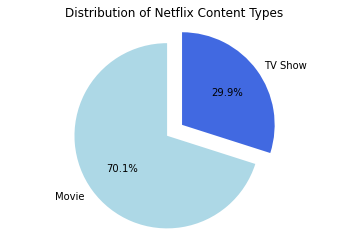

In [92]:
# Call the function for Netflix
plot_content_distribution(netflix_data, 'Netflix')

Netflix has 40.1% more movies than TV shows in its content library, showing a strong focus on movies.

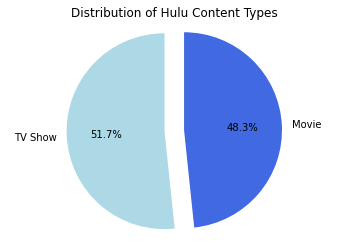

In [93]:
# Call the function for Hulu
plot_content_distribution(hulu_data, 'Hulu')

TV shows take slightly higher priority in Hulu's content selection compared to movies.

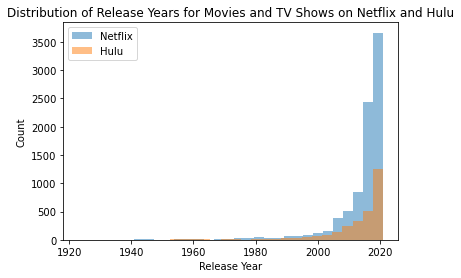

In [94]:
# Visual 1

# Create histograms for Netflix and Hulu release years
plt.hist(netflix_data['release_year'], bins=30, alpha=0.5, label='Netflix')
plt.hist(hulu_data['release_year'], bins=30, alpha=0.5, label='Hulu')

# Set the labels and title
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Years for Movies and TV Shows on Netflix and Hulu')

# Add a legend
plt.legend()

# Display the plot
plt.show()

To compare the growth trends of Netflix's and Hulu's release year distributions, we can visually analyze the histogram and observe the following:

Similarity in Early Years: Initially, Netflix's distribution closely resembled that of Hulu, indicating a comparable number of releases in the early years.

Significant Growth for Netflix: Starting after the year 2000, Netflix's distribution experienced substantial growth, surpassing that of Hulu. This suggests that Netflix expanded its content library at a faster pace during this period.

Continued Expansion: The growth trend for Netflix continued over time, with its distribution consistently surpassing Hulu's. By the year 2020, Netflix's distribution had doubled that of Hulu, indicating its significant increase in content over the years.

By comparing the release year distributions of Netflix and Hulu, we can observe the divergent growth trajectories of the two platforms, with Netflix experiencing notable expansion and surpassing Hulu's content offerings in terms of release years.

# Are there any notable differences in the distribution of movie and tv show ratings between Netflix and Hulu?

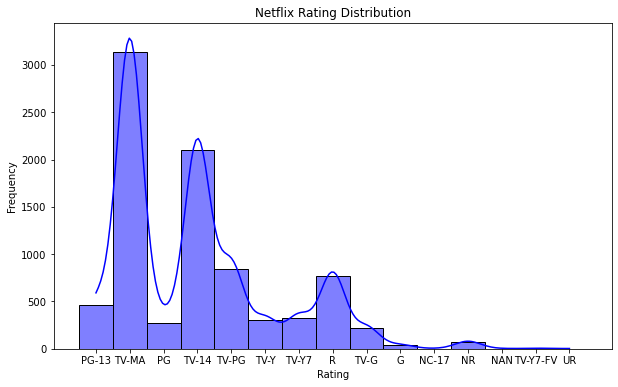

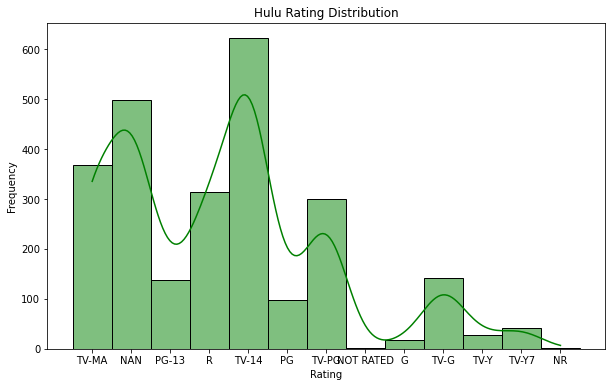

In [95]:
# Set the figure size for Netflix
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a histogram of ratings for Netflix
sns.histplot(data=netflix_data, x='rating', bins=10, kde=True, color='blue')

# Set the labels and title for Netflix histogram
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Netflix Rating Distribution')

# Display the Netflix histogram
plt.show()

# Set the figure size for Hulu
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a histogram of ratings for Hulu
sns.histplot(data=hulu_data, x='rating', bins=10, kde=True, color='green')

# Set the labels and title for Hulu histogram
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Hulu Rating Distribution')

# Display the Hulu histogram
plt.show()

The histogram reveals a notable difference between the two streaming platforms, Netflix and Hulu, in terms of the rating content.

For Netflix, the most frequently assigned rating is TV-MA, which indicates content suitable for mature audiences. With over 3,000 movie or TV show carrying this rating, it is evident that Netflix offers a significant amount of mature content. Following TV-MA, the TV-14 rating is the second most common, with approximately 2,000 falling into this category.

In contrast, Hulu appears to have a different rating distribution. The highest-rated category on Hulu is TV-14, with over 500 Movie or TV show falling into this rating. This suggests that Hulu tends to offer content that is suitable for viewers aged 14 and above, while potentially providing a lesser amount of mature or adult-oriented content compared to Netflix.
The histogram reveals these differences in the rating distribution, highlighting distinct approaches to content categorization and audience targeting between the two streaming platforms.

# 5.2: Reflection

If I had more time to complete the project, I would consider separating TV shows and movies into distinct categories within the dataset. This separation would allow for more focused analysis and exploration of patterns and trends specific to each category. By organizing the data in this manner, it would be easier to conduct separate analyses for TV shows and movies, enabling a deeper understanding of audience preferences, content availability, and performance metrics within each category.